# Problem Statement:
We'll optimize a simple mathematical function called the Rosenbrock function, which is often used as a benchmark for optimization algorithms. The Rosenbrock function is defined as:

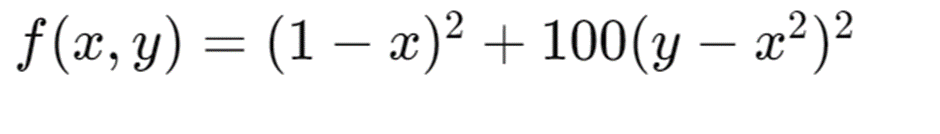



Our goal is to find the values of �x and �y that minimize the Rosenbrock function.


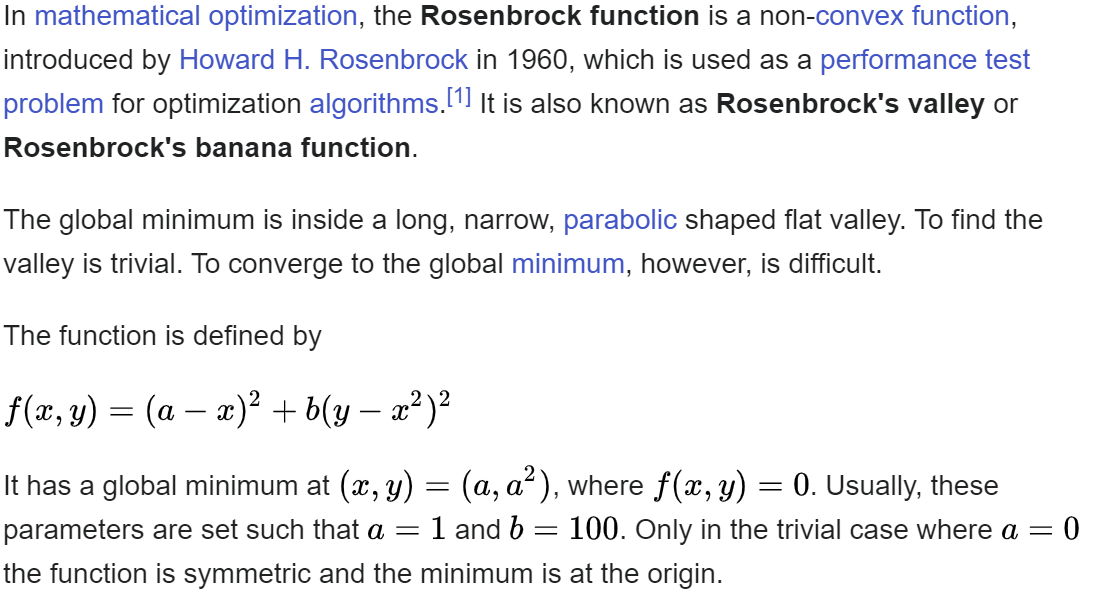

# Ant Colony Optimization (ACO):


In [1]:
import numpy as np

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Ant Colony Optimization
def ant_colony_optimization(num_ants, num_iterations, evaporation_rate=0.5, pheromone_constant=1.0, heuristic_constant=1.0):
    # Initialize pheromone matrix
    pheromone_matrix = np.ones((num_ants, 2)) / num_ants
    
    # Initialize best solution
    best_solution = None
    best_fitness = float('inf')
    
    # Main loop
    for _ in range(num_iterations):
        # Generate solutions (ants)
        ants = np.random.uniform(-5, 5, size=(num_ants, 2))
        
        # Evaluate fitness
        fitness = np.array([rosenbrock(x, y) for x, y in ants])
        
        # Update pheromone levels
        for i in range(num_ants):
            pheromone_matrix[i] *= (1 - evaporation_rate)
            pheromone_matrix[i] += pheromone_constant / fitness[i]
        
        # Select best solution
        best_ant_index = np.argmin(fitness)
        if fitness[best_ant_index] < best_fitness:
            best_solution = ants[best_ant_index]
            best_fitness = fitness[best_ant_index]
    
    return best_solution, best_fitness

# Parameters
num_ants = 20
num_iterations = 100

# Run Ant Colony Optimization
best_solution_aco, best_fitness_aco = ant_colony_optimization(num_ants, num_iterations)

# Output results
print("Best Solution (Ant Colony Optimization):", best_solution_aco)
print("Best Fitness (Ant Colony Optimization):", best_fitness_aco)


Best Solution (Ant Colony Optimization): [0.98153319 0.9527371 ]
Best Fitness (Ant Colony Optimization): 0.01172654713066283


# Implementation Steps for Ant Colony Optimization (ACO):

Initialize Pheromone Levels: Initialize the pheromone levels on the edges of the search space.

Generate Ants: Generate an initial population of ants with random positions in the search space.

Evaluate Fitness: Evaluate the fitness (objective function value) of each ant by
calculating the Rosenbrock function for its position.

Update Pheromone Levels: Update the pheromone levels on the edges based on the quality of the solutions found by ants.

Repeat until convergence or for a fixed number of iterations:

Ant Movement: Each ant moves probabilistically through the search space, following pheromone trails and considering heuristic information (e.g., distance between solutions).

Local Pheromone Update: At each step, ants deposit pheromone on the edges they traverse, with the amount based on the quality of the solution found.
Global Pheromone Update: After all ants complete their tours, global pheromone update is performed to evaporate existing pheromone and reinforce good paths.

Output Best Solution: Output the best solution found by the algorithm, which corresponds to the ant with the best fitness value.

# Bee Colony Optimization:

In [6]:
import numpy as np

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Bee Colony Optimization
def bee_colony_optimization(num_bees, num_iterations):
    # Initialize bees
    bees = np.random.uniform(-5, 5, size=(num_bees, 2))
    
    # Initialize best solution
    best_solution = None
    best_fitness = float('inf')
    
    # Main loop
    for _ in range(num_iterations):
        # Evaluate fitness
        fitness = np.array([rosenbrock(x, y) for x, y in bees])
        
        # Communication and recruitment
        best_bee_index = np.argmin(fitness)
        best_bee = bees[best_bee_index]
        other_bees = bees[np.arange(len(bees)) != best_bee_index]
        for i in range(len(bees)):
            if np.random.rand() < 0.5:
                bees[i] = best_bee + np.random.uniform(-1, 1, size=2)
            else:
                bees[i] = other_bees[np.random.randint(len(other_bees))] + np.random.uniform(-1, 1, size=2)
        
        # Select best solution
        best_bee_index = np.argmin(fitness)
        if fitness[best_bee_index] < best_fitness:
            best_solution = bees[best_bee_index]
            best_fitness = fitness[best_bee_index]
    
    return best_solution, best_fitness

# Parameters
num_bees = 20
num_iterations = 100

# Run Bee Colony Optimization
best_solution_bco, best_fitness_bco = bee_colony_optimization(num_bees, num_iterations)

# Output results
print("Best Solution (Bee Colony Optimization):", best_solution_bco)
print("Best Fitness (Bee Colony Optimization):", best_fitness_bco)


Best Solution (Bee Colony Optimization): [ 2.06075172 -0.19708776]
Best Fitness (Bee Colony Optimization): 0.0011464846061509763


# Implementation Steps for Bee Colony Optimization (BCO):

Generate Bees: Generate an initial population of bees with random positions in the search space.

Evaluate Fitness: Evaluate the fitness (objective function value) of each bee by calculating the Rosenbrock function for its position.

Repeat until convergence or for a fixed number of iterations:

Bee Communication and Recruitment: Bees communicate information about good solutions and recruit other bees to promising locations.

Local Search: Each bee explores its neighborhood by moving to a new position based on its current position and velocity.

Update Solutions: Bees update their positions based on the results of the local search.

Output Best Solution: Output the best solution found by the algorithm, which corresponds to the bee with the best fitness value.

# Particle Swarm Optimization (PSO):

In [5]:
import numpy as np

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Particle Swarm Optimization (PSO) algorithm
def pso(num_particles, num_iterations, inertia_weight=0.9, cognitive_weight=2.0, social_weight=2.0):
    # Initialize swarm
    particles = np.random.uniform(-5, 5, size=(num_particles, 2))
    velocities = np.zeros_like(particles)
    best_positions = particles.copy()
    best_fitness_values = np.array([rosenbrock(x, y) for x, y in particles])
    global_best_index = np.argmin(best_fitness_values)
    global_best_position = particles[global_best_index].copy()
    global_best_fitness = best_fitness_values[global_best_index]
    
    # PSO main loop
    for _ in range(num_iterations):
        # Update velocities and positions
        cognitive_component = cognitive_weight * np.random.rand() * (best_positions - particles)
        social_component = social_weight * np.random.rand() * (global_best_position - particles)
        velocities = inertia_weight * velocities + cognitive_component + social_component
        particles += velocities
        
        # Clip positions to bounds
        particles = np.clip(particles, -5, 5)
        
        # Update fitness values
        fitness_values = np.array([rosenbrock(x, y) for x, y in particles])
        
        # Update best positions and global best
        improved_indices = np.where(fitness_values < best_fitness_values)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness_values[improved_indices] = fitness_values[improved_indices]
        global_best_index = np.argmin(best_fitness_values)
        global_best_position = particles[global_best_index].copy()
        global_best_fitness = best_fitness_values[global_best_index]
    
    return global_best_position, global_best_fitness

# Parameters
num_particles = 50
num_iterations = 100

# Run PSO algorithm
best_solution, best_fitness = pso(num_particles, num_iterations)

# Output results
print("PSO Best Solution:", best_solution)
print("PSO Best Fitness:", best_fitness)


PSO Best Solution: [ 1.69333463 -0.59827795]
PSO Best Fitness: 0.008570934833437521


# Particle Swarm Optimization (PSO) Implementation Steps:
Initialize Swarm: Generate an initial swarm of particles with random positions and velocities in the search space.

Evaluate Fitness: Evaluate the fitness (objective function value) of each particle by calculating the Rosenbrock function.

Update Particle Velocities and Positions: Update particle velocities and positions using the PSO equations based on individual and global best positions.

Repeat: Repeat steps 2-3 for a certain number of iterations or until a convergence criterion is met.

Output: Output the best solution found.

# Bat Algorithm (BA):

In [7]:
import numpy as np

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Bat Algorithm
def bat_algorithm(num_bats, num_iterations, alpha=0.5, gamma=0.5, fmin=0, fmax=1, A=1, r0=0.5):
    # Initialize bats
    bats = np.random.uniform(-5, 5, size=(num_bats, 2))
    velocities = np.zeros_like(bats)
    
    # Main loop
    for _ in range(num_iterations):
        # Evaluate fitness
        fitness = np.array([rosenbrock(x, y) for x, y in bats])
        
        # Update velocities and positions
        frequencies = fmin + (fmax - fmin) * np.random.rand(num_bats)
        velocities += (bats - bats.min(axis=0)) * frequencies[:, np.newaxis]
        bats += velocities
        
        # Explore the search space
        for i in range(num_bats):
            if np.random.rand() > r0:
                bats[i] = bats[i] + alpha * np.random.normal(0, 1, size=2)
        
        # Select best solutions
        for i in range(num_bats):
            if np.random.rand() < gamma and rosenbrock(*bats[i]) < fitness[i]:
                bats[i] = bats[i] + A * np.random.normal(0, 1, size=2)
        
    # Output best solution
    best_solution_index = np.argmin(fitness)
    best_solution = bats[best_solution_index]
    best_fitness = fitness[best_solution_index]
    
    return best_solution, best_fitness

# Parameters
num_bats = 20
num_iterations = 100

# Run Bat Algorithm
best_solution_ba, best_fitness_ba = bat_algorithm(num_bats, num_iterations)

# Output results
print("Best Solution (Bat Algorithm):", best_solution_ba)
print("Best Fitness (Bat Algorithm):", best_fitness_ba)


Best Solution (Bat Algorithm): [-8.02629910e-01  4.30867218e+29]
Best Fitness (Bat Algorithm): 7.558637644633967e+60


# Implementation Steps for Bat Algorithm (BA):

Initialize Bats: Generate an initial population of bats with random positions in the search space.

Evaluate Fitness: Evaluate the fitness (objective function value) of each bat by calculating the Rosenbrock function for its position.
    
Repeat until convergence or for a fixed number of iterations:
    
Emission Rate: Adjust the emission rate and loudness for each bat, controlling the exploration and exploitation phases.
    
Update Bat Positions: Update the positions of bats based on their current positions, velocities, and exploration of the search space.
    
Frequency Adjustment: Adjust the frequency of pulse emissions for each bat to explore the search space effectively.
    
Output Best Solution: Output the best solution found by the algorithm, which corresponds to the bat with the best fitness value.

# Firefly Algorithm (FA):

In [8]:
import numpy as np

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Firefly Algorithm
def firefly_algorithm(num_fireflies, num_iterations, alpha=0.1, beta=1, gamma=1):
    # Initialize fireflies
    fireflies = np.random.uniform(-5, 5, size=(num_fireflies, 2))
    
    # Main loop
    for _ in range(num_iterations):
        # Evaluate attractiveness
        attractiveness = np.array([1 / (1 + beta * rosenbrock(x, y)) for x, y in fireflies])
        
        # Move fireflies towards brighter ones
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if attractiveness[j] > attractiveness[i]:
                    r = np.linalg.norm(fireflies[i] - fireflies[j])
                    fireflies[i] += alpha * (attractiveness[j] - attractiveness[i]) * (fireflies[j] - fireflies[i]) / (r + gamma)
        
    # Output best solution
    fitness = np.array([rosenbrock(x, y) for x, y in fireflies])
    best_solution_index = np.argmin(fitness)
    best_solution = fireflies[best_solution_index]
    best_fitness = fitness[best_solution_index]
    
    return best_solution, best_fitness

# Parameters
num_fireflies = 20
num_iterations = 100

# Run Firefly Algorithm
best_solution_fa, best_fitness_fa = firefly_algorithm(num_fireflies, num_iterations)

# Output results
print("Best Solution (Firefly Algorithm):", best_solution_fa)
print("Best Fitness (Firefly Algorithm):", best_fitness_fa)


Best Solution (Firefly Algorithm): [1.68638986 2.63981264]
Best Fitness (Firefly Algorithm): 4.636734832132256


# Implementation Steps for Firefly Algorithm (FA):

Initialize Fireflies: Generate an initial population of fireflies with random positions in the search space.

Evaluate Fitness: Evaluate the fitness (objective function value) of each firefly by calculating the Rosenbrock function for its position.

Repeat until convergence or for a fixed number of iterations:

Firefly Attraction: Each firefly moves towards brighter fireflies in its vicinity, simulating attraction based on their brightness (fitness value).

Move Fireflies: Update the positions of fireflies based on their attraction towards brighter fireflies and exploration of the search space.

Output Best Solution: Output the best solution found by the algorithm, which corresponds to the firefly with the best fitness value.

In [13]:
import numpy as np

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Genetic Algorithm (GA) parameters
population_size = 50
num_generations = 100
mutation_rate = 0.01

# Initialize population
population = np.random.uniform(-5, 5, size=(population_size, 2))

# GA main loop
for _ in range(num_generations):
    # Evaluate fitness
    fitness_values = np.array([rosenbrock(x, y) for x, y in population])
    
    # Selection (tournament selection)
    selected_indices = np.random.choice(population_size, size=population_size // 2, replace=False)
    selected_population = population[selected_indices]
    selected_fitness_values = fitness_values[selected_indices]
    
    # Crossover (single-point crossover)
    crossover_point = np.random.randint(1, 2, size=population_size // 2)  # Corrected crossover point generation
    offspring = np.empty_like(selected_population)
    for i in range(0, len(selected_population), 2):
        for j in range(len(selected_population[i])):
            if j < crossover_point[i]:
                offspring[i, j] = selected_population[i, j]
                offspring[i+1, j] = selected_population[i+1, j]
            else:
                offspring[i, j] = selected_population[i+1, j]
                offspring[i+1, j] = selected_population[i, j]
    
    # Mutation
    mutation_mask = np.random.rand(*offspring.shape) < mutation_rate
    mutation_values = np.random.uniform(-0.1, 0.1, size=offspring.shape)
    offspring += mutation_values * mutation_mask
    
    # Replace population with offspring
    population[selected_indices] = offspring

# Find best solution
best_index = np.argmin(fitness_values)
best_solution = population[best_index]
best_fitness = fitness_values[best_index]

# Output results
print("GA Best Solution:", best_solution)
print("GA Best Fitness:", best_fitness)


IndexError: index 25 is out of bounds for axis 0 with size 25